In [16]:
from tensorflow.keras.models import load_model

feature_extractor = load_model('extractor.h5')
print ("Loaded pre-trained convolution layers!")

Loaded pre-trained convolution layers!


In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import optimizers
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print (x_train.shape)
print (x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
features = feature_extractor.predict(x_train)
features_test = feature_extractor.predict(x_test)

print (features.shape)
print (features_test.shape)

(50000, 10)
(10000, 10)


In [20]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard

class DeepAutoencoder:
    def __init__(self):
        self.encoder_model = None
        self.model = None
        return
    
    def build(self, input_dim, encoding_dim, opt):
        input_layer = Input(shape=(input_dim,))
        
        hidden_one = Dense(encoding_dim*4, activation='relu') (input_layer)
        hidden_two = Dense(encoding_dim*2, activation='relu') (hidden_one)
        encoder_output = Dense(encoding_dim, activation='relu') (hidden_two)
        self.encoder_model = Model(input_layer, encoder_output)
        
        hidden_three = Dense(encoding_dim*2, activation='relu') (encoder_output)
        hidden_four = Dense(encoding_dim*4, activation='relu') (hidden_three)
        decoder_output = Dense(input_dim, activation='sigmoid') (hidden_four)
        self.model = Model(input_layer, decoder_output)
        
        self.model.compile(optimizer=opt, loss='binary_crossentropy', )
        return
    
    def load(self, model_file, encoder_model_file):
        self.encoder_model = load_model(encoder_model_file)
        self.model = load_model(model_file)
        return
    
    def train(self, train_input, train_output,
             val_input, val_output,
             epochs=50,
             batch_size=256,
             shuffle=True):
        tensorboard = TensorBoard(log_dir='./tf_logs_two', histogram_freq=0, write_graph=True, write_images=False)
        history = self.model.fit(train_input, train_output,
                      epochs=epochs, batch_size=batch_size,
                      shuffle=True,
                      validation_data=(val_input, val_output),
                      callbacks=[tensorboard]
                      )
        return history
    
    def encoder_predict(self, test_input):
        return self.encoder_model.predict(test_input)
    
    def predict(self, test_input):
        return self.model.predict(test_input)
    
    def save(self, model_file, encoder_model_file):
        self.model.save(model_file)
        self.encoder_model.save(encoder_model_file)
        return

In [21]:
from tensorflow.keras import optimizers

pretrain_features_size = 10
target_dim_size = 32
autoencoder = DeepAutoencoder()
opt = optimizers.Adam(lr=0.0001)
autoencoder.build(pretrain_features_size, target_dim_size, opt)

In [22]:
history = autoencoder.train(features, features, features_test, features_test,
                 epochs=50,
                 batch_size=256,
                 shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 1s 23us/sample - loss: 0.5398 - val_loss: 0.3192
Epoch 2/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.2875 - val_loss: 0.2439
Epoch 3/50
50000/50000 [==============================] - 1s 14us/sample - loss: 0.1559 - val_loss: 0.0933
Epoch 4/50
50000/50000 [==============================] - 1s 15us/sample - loss: 0.0432 - val_loss: 0.0481
Epoch 5/50
50000/50000 [==============================] - 1s 14us/sample - loss: 0.0224 - val_loss: 0.0439
Epoch 6/50
50000/50000 [==============================] - 1s 14us/sample - loss: 0.0197 - val_loss: 0.0430
Epoch 7/50
50000/50000 [==============================] - 1s 14us/sample - loss: 0.0189 - val_loss: 0.0423
Epoch 8/50
50000/50000 [==============================] - 1s 14us/sample - loss: 0.0186 - val_loss: 0.0418
Epoch 9/50
50000/50000 [==============================] - 1s 14us/sample - loss: 0.0183 - val_

dict_keys(['loss', 'val_loss'])


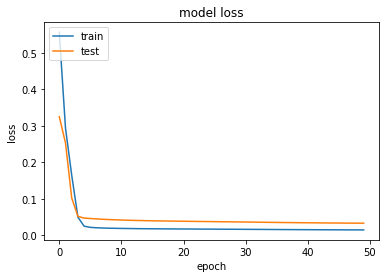

In [14]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
autoencoder.save('ae-complete.h5', 'ae-encoder.h5')
print ("Saved!")

Saved!
